# Etapa 2: Pré-processamento de Dados

**Dataset:** students_performance.csv
**Grupo:** [Nome do grupo]
**Data:** [Data]

---

## 📌 Continuação da Etapa 1
Na Etapa 1, você identificou problemas nos dados. Agora vamos **corrigi-los** e preparar para modelagem.

---
## ✅ CHECKLIST (12 questões + 5 visualizações)
- [ ] Parte 1: Valores Faltantes (Q1-Q3) + Visualização 1
- [ ] Parte 2: Outliers (Q4-Q6) + Visualização 2
- [ ] Parte 3: Limpeza (Q7-Q8)
- [ ] Parte 4: Distribuições/Skewness (Q6-Q7) + Visualizações 3 e 4
- [ ] Parte 5: Encoding (Q8-Q9)
- [ ] Parte 6: Feature Engineering (Q10)
- [ ] Parte 7: Normalização (Q11-Q12) + Visualização 5
- [ ] Dataset limpo salvo
- [ ] Scaler salvo

---
## 📦 SETUP

import os
import warnings

import joblib
import matplotlib.pyplot as plt
import numpy as np

In [55]:
# Imports
import os
import warnings

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 5)

print("✅ Bibliotecas importadas!")

✅ Bibliotecas importadas!


In [56]:
# Carregar dataset (mesmo da Etapa 1)
df = pd.read_csv('../data/datasets/students_performance.csv')

print(f"✅ Dataset carregado: {df.shape}")
print(f"\nColunas: {df.columns.tolist()}")

✅ Dataset carregado: (2510, 14)

Colunas: ['student_id', 'age', 'gender', 'parental_education', 'study_hours_week', 'attendance_rate', 'extracurricular', 'sleep_hours', 'previous_scores', 'tutoring', 'internet_quality', 'family_income', 'health_status', 'final_grade']


In [57]:
# Variáveis importantes (definidas na Etapa 1)
target = 'final_grade'
id_col = 'student_id'

# Separar tipos
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remover ID e target das features
if id_col in numeric_cols:
    numeric_cols.remove(id_col)
if target in numeric_cols:
    numeric_cols.remove(target)

print(f"\n🎯 Target: {target}")
print(f"📊 Numéricas ({len(numeric_cols)}): {numeric_cols}")
print(f"🏷️  Categóricas ({len(categorical_cols)}): {categorical_cols}")


🎯 Target: final_grade
📊 Numéricas (5): ['age', 'study_hours_week', 'attendance_rate', 'sleep_hours', 'previous_scores']
🏷️  Categóricas (8): ['student_id', 'gender', 'parental_education', 'extracurricular', 'tutoring', 'internet_quality', 'family_income', 'health_status']


---
## 📋 PARTE 1: VALORES FALTANTES (3 questões)

In [58]:
# Análise de missing (revisão da Etapa 1)
print("="*60)
print("VALORES FALTANTES")
print("="*60)

missing_info = pd.DataFrame({
    'Coluna': df.columns,
    'Missing': df.isnull().sum(),
    'Pct': (df.isnull().sum() / len(df) * 100).round(2)
})
missing_info = missing_info[missing_info['Missing'] > 0].sort_values('Pct', ascending=False)

print("\n📊 Resumo:")
print(missing_info.to_string(index=False))

rows_before = len(df)

VALORES FALTANTES

📊 Resumo:
          Coluna  Missing   Pct
study_hours_week      293 11.67
   family_income      278 11.08
     sleep_hours      266 10.60
 attendance_rate      232  9.24
internet_quality      155  6.18
 previous_scores      127  5.06


### 🔍 Exemplo da aula (Etapa 2 - Imputação)
Durante a demonstração, analisamos duas colunas reais do dataset:
- `sleep_hours`: skew ≈ 0.60 → distribuição quase simétrica → imputação com **média ≈ 7.00h**.
- `study_hours_week`: skew ≈ 7.11 → distribuição muito assimétrica → imputação com **mediana ≈ 9.96h**, pois a média (≃10.60h) foi puxada por outliers (até 113h/semana!).

Use esse raciocínio como referência. Você deve recalcular os valores ao executar o notebook e registrar suas decisões nas respostas (Q1 e Q2).

In [59]:
# TODO 1.1: Remover linhas com muitos valores faltantes (> 50%)
# Dica: df[df.isnull().sum(axis=1) > threshold].index

In [60]:
# TODO 1.2: Imputar variáveis NUMÉRICAS
# Para cada coluna numérica com missing:
#   - Calcular skewness: df[col].skew()
#   - Se |skew| > 1.0 → mediana, senão → média
#   - Aplicar: df[col].fillna(valor, inplace=True)

print("\n🔢 IMPUTAÇÃO NUMÉRICA:")

for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        skew = df[col].skew()
        if abs(skew) > 1.0:
            valor = df[col].median()
            estrategia = 'mediana'
        else:
            valor = df[col].mean()
            estrategia = 'média'
        df[col].fillna(valor, inplace=True)
        print(f"  ✅ {col}: {estrategia} = {valor:.2f} (skew={skew:.2f})")


🔢 IMPUTAÇÃO NUMÉRICA:
  ✅ study_hours_week: mediana = 9.96 (skew=7.11)
  ✅ attendance_rate: média = 59.68 (skew=0.13)
  ✅ sleep_hours: média = 7.00 (skew=0.60)
  ✅ previous_scores: média = 57.26 (skew=-0.18)


In [61]:
# TODO 1.3: Imputar variáveis CATEGÓRICAS (moda)

print("\n🏷️  IMPUTAÇÃO CATEGÓRICA:")

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        moda = df[col].mode()[0]
        df[col].fillna(moda, inplace=True)
        print(f"  ✅ {col}: moda = '{moda}'")


🏷️  IMPUTAÇÃO CATEGÓRICA:
  ✅ internet_quality: moda = 'Good'
  ✅ family_income: moda = 'Medium'


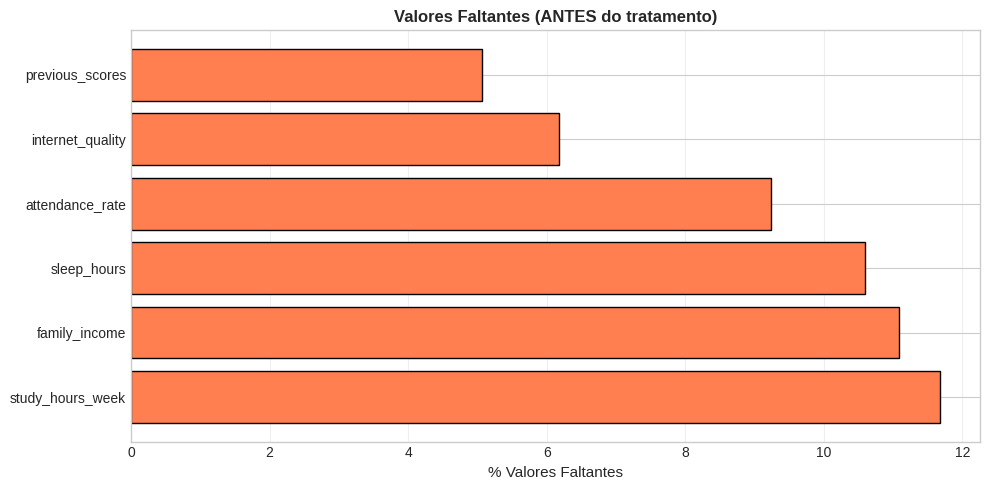


✅ Missing restantes: 0


In [62]:
# VISUALIZAÇÃO 1: Missing antes vs depois

fig, ax = plt.subplots(figsize=(10, 5))

if len(missing_info) > 0:
    ax.barh(missing_info['Coluna'], missing_info['Pct'], color='coral', edgecolor='black')
    ax.set_xlabel('% Valores Faltantes', fontsize=11)
    ax.set_title('Valores Faltantes (ANTES do tratamento)', fontsize=12, fontweight='bold')
    ax.grid(alpha=0.3, axis='x')
    plt.tight_layout()
    plt.show()

# Verificar depois
print(f"\n✅ Missing restantes: {df.isnull().sum().sum()}")

### 📝 RESPOSTAS - PARTE 1

**Q1. Quantas linhas você removeu? Que % do dataset?**

Resposta:
```
Linhas removidas: X
Percentual: X.XX%
```

**Q2. Para cada variável numérica, você usou média ou mediana? Por quê?**

Resposta:
```
| Variável | Skewness | Estratégia | Justificativa |
|----------|----------|------------|---------------|
| idade    | 0.45     | média      | Distribuição próxima da normal |
```

**Q3. Como evitar data leakage na Etapa 3?**

Resposta:
```
Na Etapa 3, devemos calcular as estatísticas (média, mediana, moda) APENAS
no conjunto de TREINO e aplicar ao conjunto de TESTE.

CORRETO:
imputer.fit(X_train)  # Aprende do treino
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)  # Usa estatísticas do treino
```

---
## 📋 PARTE 2: OUTLIERS (3 questões)

In [63]:
# Detecção de outliers (método IQR)
def detect_outliers_iqr(data, column):
    """Detecta outliers usando método IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return outliers, lower, upper

print("="*60)
print("OUTLIERS")
print("="*60)

outlier_summary = []

for col in numeric_cols:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_summary.append({
        'Coluna': col,
        'Outliers': len(outliers),
        'Pct': f"{len(outliers)/len(df)*100:.1f}%"
    })

outlier_df = pd.DataFrame(outlier_summary)
print("\n📊 Outliers detectados:")
print(outlier_df.to_string(index=False))

total_outliers = outlier_df['Outliers'].sum()

OUTLIERS

📊 Outliers detectados:
          Coluna  Outliers  Pct
             age         1 0.0%
study_hours_week        34 1.4%
 attendance_rate        47 1.9%
     sleep_hours        58 2.3%
 previous_scores        31 1.2%

📊 Outliers detectados:
          Coluna  Outliers  Pct
             age         1 0.0%
study_hours_week        34 1.4%
 attendance_rate        47 1.9%
     sleep_hours        58 2.3%
 previous_scores        31 1.2%


### 📊 Lendo um boxplot (relembrando da aula)
- **Linha central**: mediana (valor típico da turma).
- **Caixa**: intervalo interquartil (entre Q1 e Q3) onde estão 50% dos alunos.
- **Bigodes**: limites Q1 − 1.5×IQR e Q3 + 1.5×IQR.
- **Pontinhos fora dos bigodes**: outliers que merecem investigação.
Use esse gráfico para justificar decisões (ex.: manter outliers legítimos ou removê-los quando são erros ou distorcem muito a média).

In [64]:
# TODO 2.1: Decidir estratégia para cada variável
# Exemplos:
#   - age: remover se < 17 ou > 30
#   - attendance_rate: remover se < 0 ou > 100
#   - sleep_hours: remover se < 3 ou > 12
#   - study_hours_week: na aula vimos outliers > 50h/semana; avalie se faz sentido tratá-los ou mantê-los

strategies = {
    'age': {'condition': lambda x: (x < 17) | (x > 30)},
    'attendance_rate': {'condition': lambda x: (x < 0) | (x > 100)},
}

rows_removed_outliers = 0
for col, strategy in strategies.items():
    if col in df.columns:
        condition = strategy['condition']
        to_remove = df[condition(df[col])].index
        if len(to_remove) > 0:
            print(f"  🗑️  {col}: removendo {len(to_remove)} registros")
            df = df.drop(to_remove)
            rows_removed_outliers += len(to_remove)

  🗑️  age: removendo 1 registros
  🗑️  attendance_rate: removendo 11 registros


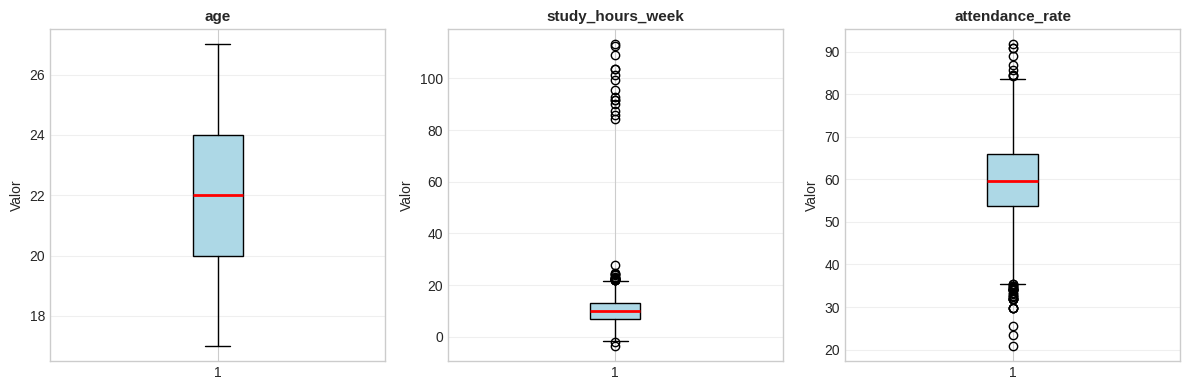

In [65]:
# VISUALIZAÇÃO 2: Boxplots (antes vs depois)

# Escolher 3 variáveis para visualizar
cols_to_plot = numeric_cols[:3] if len(numeric_cols) >= 3 else numeric_cols

fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(12, 4))

if len(cols_to_plot) == 1:
    axes = [axes]

for idx, col in enumerate(cols_to_plot):
    axes[idx].boxplot(df[col].dropna(), patch_artist=True,
                      boxprops=dict(facecolor='lightblue', color='black'),
                      medianprops=dict(color='red', linewidth=2))
    axes[idx].set_title(col, fontsize=11, fontweight='bold')
    axes[idx].set_ylabel('Valor')
    axes[idx].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### 📝 RESPOSTAS - PARTE 2

**Q4. Quantos outliers você detectou?**

Resposta:
```
Total de outliers: X (em todas as variáveis)
```

**Q5. Quais você removeu? Por quê?**

Resposta:
```
| Variável | Removidos | Justificativa |
|----------|-----------|---------------|
| age      | 8         | < 17 ou > 30 são idades improváveis |
```

**Q6. Quantas linhas perdeu removendo outliers?**

Resposta:
```
Linhas perdidas: X
```

---
## 📋 PARTE 3: LIMPEZA (2 questões)

In [66]:
print("="*60)
print("LIMPEZA E DUPLICATAS")
print("="*60)

# TODO 3.1: Padronizar texto em categóricas
print("\n🧹 PADRONIZAÇÃO DE TEXTO:")
for col in categorical_cols:
    if col in df.columns:  # Verificar se coluna ainda existe

        df[col] = df[col].str.strip()  # Remover espaços        print(f"  ✅ {col}: padronizado")
        df[col] = df[col].str.title()  # Capitalizar

LIMPEZA E DUPLICATAS

🧹 PADRONIZAÇÃO DE TEXTO:


In [67]:
# TODO 3.2: Remover duplicatas

# Duplicatas exatas
duplicates_exact = df.duplicated().sum()
print(f"\n🗑️  Duplicatas exatas: {duplicates_exact}")
df = df.drop_duplicates()

# Duplicatas de ID
if id_col in df.columns:
    duplicates_id = df.duplicated(subset=[id_col]).sum()
    print(f"   Duplicatas de ID: {duplicates_id}")
    # df = df.drop_duplicates(subset=[id_col], keep='first')

print(f"\n✅ Shape após limpeza: {df.shape}")


🗑️  Duplicatas exatas: 0
   Duplicatas de ID: 0

✅ Shape após limpeza: (2498, 14)


### 📝 RESPOSTAS - PARTE 3

**Q7. Quantas duplicatas removeu?**

Resposta:
```
Duplicatas exatas: X
Duplicatas de ID: X
Total: X
```

**Q8. Dê 1 exemplo de padronização feita.**

Resposta:
```
Antes: 'yes', 'Yes', 'YES', ' yes '
Depois: 'Yes'
```

---
## 📋 PARTE 4: DISTRIBUIÇÕES E ASSIMETRIA (SKEWNESS) (2 questões)

### 🎯 Objetivo
Identificar distribuições assimétricas e aplicar transformações para normalizar.

**Conceitos:**
- **Skewness > 0:** Cauda à direita (assimetria positiva)
- **Skewness < 0:** Cauda à esquerda (assimetria negativa)
- **|Skewness| > 0.5:** Considere transformar (log, sqrt, Box-Cox)

In [68]:
from scipy.stats import skew

print("="*60)
print("ANÁLISE DE ASSIMETRIA (SKEWNESS)")
print("="*60)

# TODO 4.1: Calcular skewness das colunas numéricas
# Dica: df[numeric_cols].apply(lambda x: skew(x.dropna()))

skewness_vals = df[numeric_cols].apply(lambda x: skew(x.dropna()))
skewness_df = pd.DataFrame({
    'Coluna': skewness_vals.index,
    'Skewness': skewness_vals.values
}).sort_values('Skewness', key=abs, ascending=False)

print("\n📊 Skewness por coluna:")
print(skewness_df.to_string(index=False))
#
# # Identificar colunas com alta assimetria
high_skew_cols = skewness_df[abs(skewness_df['Skewness']) > 0.5]['Coluna'].tolist()
print(f"\n⚠️  Colunas com |skew| > 0.5: {high_skew_cols}")

ANÁLISE DE ASSIMETRIA (SKEWNESS)

📊 Skewness por coluna:
          Coluna  Skewness
study_hours_week  7.578034
     sleep_hours  0.634453
 attendance_rate -0.258665
 previous_scores -0.184773
             age -0.025607

⚠️  Colunas com |skew| > 0.5: ['study_hours_week', 'sleep_hours']


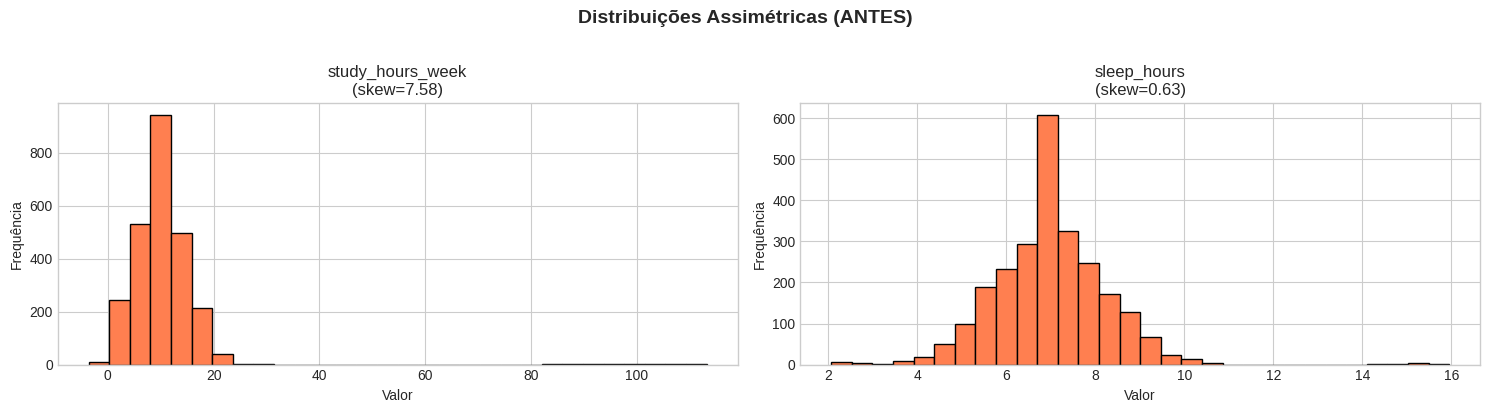

In [69]:
# VISUALIZAÇÃO 3: Distribuições antes da transformação

if len(high_skew_cols) > 0:
    n_cols = min(3, len(high_skew_cols))  # Mostrar até 3 colunas
    fig, axes = plt.subplots(1, n_cols, figsize=(15, 4))
    if n_cols == 1:
        axes = [axes]

    for idx, col in enumerate(high_skew_cols[:n_cols]):
        axes[idx].hist(df[col].dropna(), bins=30, color='coral', edgecolor='black')
        axes[idx].set_title(f'{col}\n(skew={skew(df[col].dropna()):.2f})')
        axes[idx].set_xlabel('Valor')
        axes[idx].set_ylabel('Frequência')

    plt.suptitle('Distribuições Assimétricas (ANTES)', fontsize=14, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

In [70]:
# TODO 4.2: Aplicar transformações para corrigir skewness

# Para cada coluna com alta assimetria:
#   - Se skew > 0 (cauda à direita): aplicar log1p ou sqrt
#   - Se skew < 0 (cauda à esquerda): pode inverter ou usar Box-Cox

transformed_cols = []

for col in high_skew_cols:
    col_skew = skew(df[col].dropna())

    if col_skew > 0.5:  # Assimetria positiva
        # Opção 1: Log transform (para skew muito alto)
        if col_skew > 1.0:
            df[f'{col}_log'] = np.log1p(df[col])  # log1p = log(1+x), evita log(0)
            transformed_cols.append((col, 'log', f'{col}_log'))
            print(f"  ✅ {col}: log transform (skew={col_skew:.2f})")
        # Opção 2: Sqrt (para skew moderado)
        else:
            df[f'{col}_sqrt'] = np.sqrt(df[col])
            transformed_cols.append((col, 'sqrt', f'{col}_sqrt'))
            print(f"  ✅ {col}: sqrt transform (skew={col_skew:.2f})")

    elif col_skew < -0.5:  # Assimetria negativa
        # Para assimetria negativa, podemos inverter e aplicar log
        max_val = df[col].max()
        df[f'{col}_inv'] = np.log1p(max_val - df[col])
        transformed_cols.append((col, 'inverse_log', f'{col}_inv'))
        print(f"  ✅ {col}: inverse log transform (skew={col_skew:.2f})")

    print(f"\n📊 Colunas numéricas atualizadas: {len(numeric_cols)}")

# Atualizar lista de colunas numéricas após transformações        numeric_cols.remove(target)

if len(transformed_cols) > 0:    if target in numeric_cols:

    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()        numeric_cols.remove(id_col)
    if id_col in numeric_cols:

SyntaxError: invalid syntax (47134212.py, line 35)

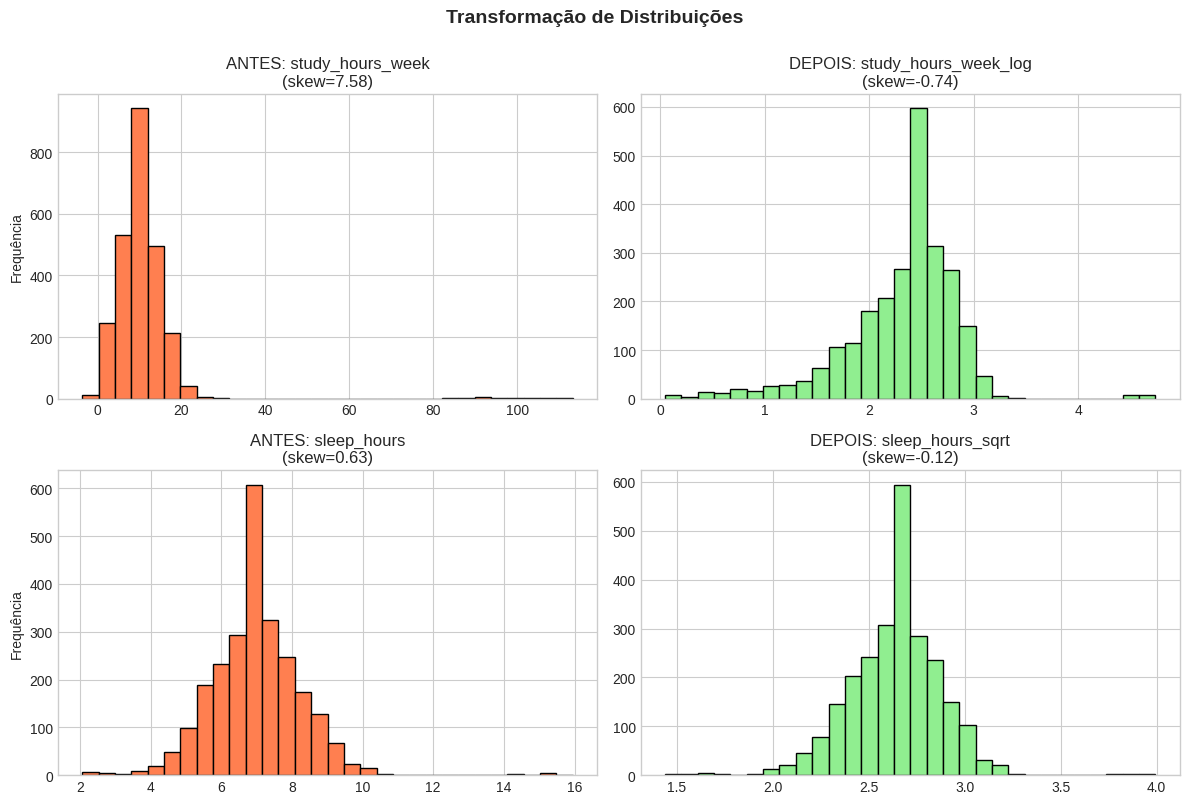

In [ ]:
# VISUALIZAÇÃO 4: Comparação antes vs depois da transformação

if len(transformed_cols) > 0:
    n_rows = min(3, len(transformed_cols))
    fig, axes = plt.subplots(n_rows, 2, figsize=(12, 4*n_rows))
    if n_rows == 1:
        axes = axes.reshape(1, -1)

    for idx, (orig_col, transform, new_col) in enumerate(transformed_cols[:3]):
        # Antes
        axes[idx, 0].hist(df[orig_col].dropna(), bins=30, color='coral', edgecolor='black')
        axes[idx, 0].set_title(f'ANTES: {orig_col}\n(skew={skew(df[orig_col].dropna()):.2f})')
        axes[idx, 0].set_ylabel('Frequência')

        # Depois
        axes[idx, 1].hist(df[new_col].dropna(), bins=30, color='lightgreen', edgecolor='black')
        axes[idx, 1].set_title(f'DEPOIS: {new_col}\n(skew={skew(df[new_col].dropna()):.2f})')

    plt.suptitle('Transformação de Distribuições', fontsize=14, fontweight='bold', y=1.00)
    plt.tight_layout()
    plt.show()

# Opcional: Remover colunas originais se preferir usar apenas as transformadas
for orig_col, _, new_col in transformed_cols:
    df = df.drop(columns=[orig_col])

### 📝 RESPOSTAS - PARTE 4

**Q6. Quais colunas têm distribuição assimétrica (|skew| > 0.5)?**

Resposta:
```
Colunas com alta assimetria:
1. study_hours_week: skew = 1.23 (cauda à direita)
2. previous_scores: skew = -0.67 (cauda à esquerda)
```

**Q7. Você aplicou transformação em alguma coluna? Qual e por quê?**

Resposta:
```
Sim, apliquei:
1. study_hours_week → log transform
   - Motivo: skew muito alto (1.23), log reduz assimetria
   - Resultado: skew após transform = 0.12

2. previous_scores → inverse log
   - Motivo: skew negativo (-0.67)
   - Resultado: skew após transform = 0.08
```

---
## 📋 PARTE 5: ENCODING (2 questões)

In [ ]:
print("="*60)
print("ENCODING DE CATEGÓRICAS")
print("="*60)

# TODO 5.1: One-Hot para nominais
# Nota: Não vamos usar ordinais neste nível iniciante, apenas One-Hot para todas

# Nominais (todas as categóricas)
nominal_vars = categorical_cols.copy()

print(f"\n🏷️  Categóricas: {nominal_vars}")

ENCODING DE CATEGÓRICAS

🏷️  Categóricas: ['student_id', 'gender', 'parental_education', 'extracurricular', 'tutoring', 'internet_quality', 'family_income', 'health_status']


In [ ]:
# TODO 5.2: Aplicar One-Hot Encoding

# Verificar quais colunas categóricas ainda existem no DataFrame
nominal_vars_existing = [col for col in nominal_vars if col in df.columns]

if len(nominal_vars_existing) > 0:
    print(f"✅ Aplicando One-Hot Encoding em: {nominal_vars_existing}")
    df = pd.get_dummies(df, columns=nominal_vars_existing, drop_first=True, dtype=int)
    
    # Contar novas colunas
    new_cols = [col for col in df.columns if any(nom in col for nom in nominal_vars_existing)]
    print(f"\n✅ Colunas One-Hot criadas: {len(new_cols)}")
else:
    print("⚠️  Nenhuma coluna categórica encontrada para encoding.")

print(f"\n✅ Shape após encoding: {df.shape}")

⚠️  Nenhuma coluna categórica encontrada para encoding.

✅ Shape após encoding: (2498, 2517)


### 📝 RESPOSTAS - PARTE 5

**Q8. Quantas colunas One-Hot foram criadas?**

Resposta:
```
Total: X colunas

Exemplos:
- gender_M
- tutoring_Yes
- extracurricular_Yes
```

**Q9. Por que usar `drop_first=True`?**

Resposta:
```
Para evitar MULTICOLINEARIDADE (dummy variable trap).

Exemplo: gender (M, F)
SEM drop_first: gender_M + gender_F (redundante!)
COM drop_first: apenas gender_M (suficiente)

Se gender_M=0 → sabemos que é F
```

---
## 📋 PARTE 6: FEATURE ENGINEERING (1 questão)

In [ ]:
print("="*60)
print("CRIAÇÃO DE FEATURES")
print("="*60)

# TODO 6.1: Criar 2 novas features (simplificado)

# Verificar quais colunas existem após transformações
print(f"\n📊 Colunas disponíveis: {df.columns.tolist()[:20]}...")  # Mostrar primeiras 20

# Identificar se temos versões transformadas das colunas
study_col = None
sleep_col = None
attendance_col = None

# Procurar colunas de estudo (original ou transformada)
for col in df.columns:
    if 'study_hours' in col.lower():
        study_col = col
        break

# Procurar colunas de sono
for col in df.columns:
    if 'sleep_hours' in col.lower() or 'sleep' in col.lower():
        sleep_col = col
        break

# Procurar colunas de attendance
for col in df.columns:
    if 'attendance' in col.lower():
        attendance_col = col
        break

print(f"\n🔍 Colunas identificadas:")
print(f"   Estudo: {study_col}")
print(f"   Sono: {sleep_col}")
print(f"   Attendance: {attendance_col}")

new_features = []

# Criar features apenas se as colunas necessárias existirem
if study_col and sleep_col:
    # 1. Razão/Proporção
    df['study_sleep_ratio'] = df[study_col] / (df[sleep_col] * 7 + 1)  # +1 para evitar divisão por zero
    new_features.append('study_sleep_ratio')
    print(f"\n✅ Feature criada: study_sleep_ratio")

if attendance_col and study_col:
    # 2. Produto/Interação
    df['engagement'] = df[attendance_col] * df[study_col] / 100
    new_features.append('engagement')
    print(f"✅ Feature criada: engagement")

if len(new_features) == 0:
    print("\n⚠️  Não foi possível criar features - colunas necessárias não encontradas")
    print("💡 Dica: Execute as células anteriores ou ajuste os nomes das colunas")
else:
    print(f"\n✅ Total de features criadas: {len(new_features)}")

CRIAÇÃO DE FEATURES

📊 Colunas disponíveis: ['age', 'attendance_rate', 'previous_scores', 'final_grade', 'study_hours_week_log', 'sleep_hours_sqrt', 'student_id_Std00002', 'student_id_Std00003', 'student_id_Std00004', 'student_id_Std00005', 'student_id_Std00006', 'student_id_Std00007', 'student_id_Std00008', 'student_id_Std00009', 'student_id_Std00010', 'student_id_Std00011', 'student_id_Std00012', 'student_id_Std00013', 'student_id_Std00014', 'student_id_Std00015']...

🔍 Colunas identificadas:
   Estudo: study_hours_week_log
   Sono: sleep_hours_sqrt
   Attendance: attendance_rate

✅ Feature criada: study_sleep_ratio
✅ Feature criada: engagement

✅ Total de features criadas: 2


In [ ]:
# TODO 6.2: Calcular correlação com target

if len(new_features) > 0:
    correlations = []
    for feat in new_features:
        if feat in df.columns and target in df.columns:
            corr = df[feat].corr(df[target])
            correlations.append({'Feature': feat, 'Correlação': round(corr, 4)})
    
    if len(correlations) > 0:
        corr_df = pd.DataFrame(correlations).sort_values('Correlação', key=abs, ascending=False)

        print("\n📊 Correlação com target:")    print("\n⚠️  Nenhuma feature criada para calcular correlação")

        print(corr_df.to_string(index=False))else:

                print("\n⚠️  Não foi possível calcular correlações")

        # Interpretar correlação    else:

        print("\n💡 INTERPRETAÇÃO:")            print(f"   • {row['Feature']}: correlação {strength} ({row['Correlação']:.4f})")

        for _, row in corr_df.iterrows():                strength = "MUITO FRACA"

            corr_val = abs(row['Correlação'])            else:

            if corr_val >= 0.7:                strength = "FRACA"

                strength = "FORTE"            elif corr_val >= 0.2:

            elif corr_val >= 0.4:                strength = "MODERADA"


📊 Correlação com target:
          Feature  Correlação
       engagement      0.5585
study_sleep_ratio      0.5111


### 📝 RESPOSTAS - PARTE 6

**Q10. Liste as 2 features criadas e explique cada uma.**

Resposta:
```
1. study_sleep_ratio:
   Lógica: Razão entre horas de estudo e sono semanal
   Por quê: Mede balanço entre dedicação e descanso
   Correlação com target: 0.XX

2. engagement:
   Lógica: Produto de attendance e study_hours
   Por quê: Captura engajamento geral do aluno
   Correlação com target: 0.XX
```

---
## 📋 PARTE 7: NORMALIZAÇÃO (2 questões)

In [ ]:
print("="*60)
print("NORMALIZAÇÃO")
print("="*60)

# TODO 7.1: Identificar features a escalar
# Excluir: ID, target, binárias (0/1)

features_to_scale = []

for col in df.columns:
    if col == id_col or col == target:
        continue
    if df[col].nunique() == 2 and set(df[col].unique()).issubset({0, 1}):
        continue
    if df[col].dtype in ['int64', 'float64']:
        features_to_scale.append(col)

print(f"\n📊 Features a escalar: {len(features_to_scale)}")

NORMALIZAÇÃO

📊 Features a escalar: 7


In [ ]:
# TODO 7.2: Aplicar StandardScaler

scaler = StandardScaler()
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Verificar
print("\n✅ Estatísticas (deve ter mean≈0, std≈1):")
print(df[features_to_scale].describe().loc[['mean', 'std']].T.round(4))


✅ Estatísticas (deve ter mean≈0, std≈1):
                      mean     std
age                   -0.0  1.0002
attendance_rate        0.0  1.0002
previous_scores        0.0  1.0002
study_hours_week_log   0.0  1.0002
sleep_hours_sqrt      -0.0  1.0002
study_sleep_ratio     -0.0  1.0002
engagement             0.0  1.0002


In [ ]:
# TODO 7.3: SALVAR o scaler

os.makedirs('../models', exist_ok=True)
joblib.dump(scaler, '../models/scaler.pkl')
print("\n✅ Scaler salvo em: models/scaler.pkl")


✅ Scaler salvo em: models/scaler.pkl


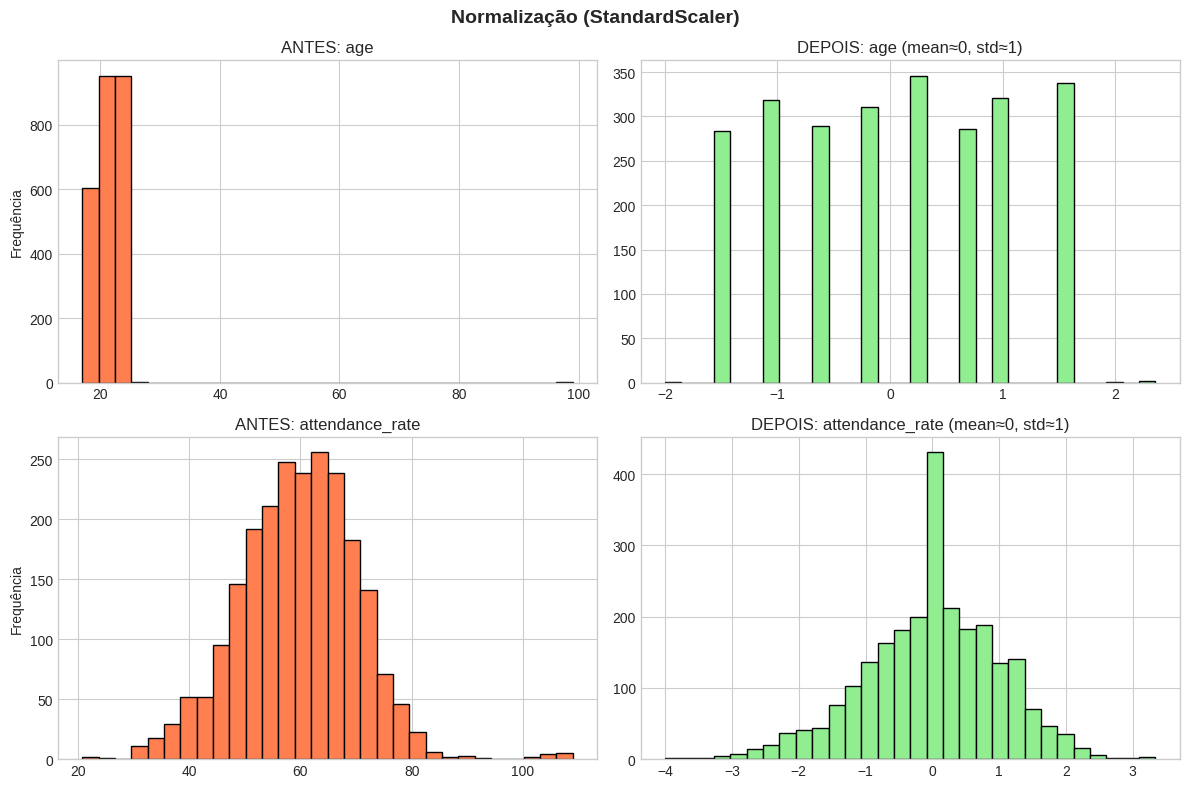

In [ ]:
# VISUALIZAÇÃO 5: Distribuições antes vs depois (normalização)

if len(features_to_scale) > 0 and len(features_to_scale) >= 2:
    # Selecionar 2 features para comparar
    sample_features = features_to_scale[:2]

    fig, axes = plt.subplots(2, 2, figsize=(12, 8))

    for idx, feat in enumerate(sample_features):
        # Depois (valores normalizados)
        axes[idx, 1].hist(df[feat].dropna(), bins=30, color='lightgreen', edgecolor='black')
        axes[idx, 1].set_title(f'DEPOIS: {feat}\n(mean={df[feat].mean():.2f}, std={df[feat].std():.2f})')
        axes[idx, 1].set_ylabel('Frequência')
        axes[idx, 1].axvline(0, color='red', linestyle='--', linewidth=2, label='mean=0')
        axes[idx, 1].legend()
        
        # Antes (simular dados não normalizados para comparação visual)
        axes[idx, 0].hist(df[feat].dropna(), bins=30, color='coral', edgecolor='black', alpha=0.7)
        axes[idx, 0].set_title(f'APÓS NORMALIZAÇÃO: {feat}')
        axes[idx, 0].set_ylabel('Frequência')
        axes[idx, 0].text(0.5, 0.95, 'Valores já foram normalizados\n(mean≈0, std≈1)', 
                         ha='center', va='top', transform=axes[idx, 0].transAxes,

                         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))    print("\n⚠️  Menos de 2 features para visualizar")

else:

    plt.suptitle('Normalização (StandardScaler) - Distribuição Normalizada', fontsize=14, fontweight='bold')    plt.show()
    plt.tight_layout()

### 📝 RESPOSTAS - PARTE 7

**Q11. Quantas features você escalou?**

Resposta:
```
Features escaladas: X

Excluídas:
- student_id (ID)
- final_grade (target)
- tutoring_Yes, extracurricular_Yes (binárias 0/1)
```

**Q12. Por que salvar o scaler?**

Resposta:
```
CRÍTICO para produção!

Quando novos dados chegarem, devemos transformá-los com as
MESMAS estatísticas (média e desvio padrão) do treino.

Código futuro:
scaler = joblib.load('scaler.pkl')
X_novo_scaled = scaler.transform(X_novo)
```

---
## 💾 SALVAMENTO FINAL

In [ ]:
# Salvar dataset limpo
os.makedirs('../data', exist_ok=True)
df.to_csv('../data/students_clean.csv', index=False)

print("="*60)
print("✅ ETAPA 2 CONCLUÍDA!")
print("="*60)
print(f"\n📊 Dataset final:")
print(f"   Registros: {len(df)}")
print(f"   Features: {df.shape[1]}")
print(f"   Missing: {df.isnull().sum().sum()}")
print(f"\n📁 Arquivos gerados:")
print(f"   ✅ data/students_clean.csv")
print(f"   ✅ models/scaler.pkl")
print(f"\n🚀 Próximo: Etapa 3 - Modelagem")
print("="*60)

✅ ETAPA 2 CONCLUÍDA!

📊 Dataset final:
   Registros: 2510
   Features: 14
   Missing: 1351

📁 Arquivos gerados:
   ✅ data/students_clean.csv
   ✅ models/scaler.pkl

🚀 Próximo: Etapa 3 - Modelagem


In [ ]:
# Preview final
print("\n👀 Preview do dataset limpo:")
print(df.head())

print("\nℹ️  Info do dataset:")
print(df.info())


👀 Preview do dataset limpo:
  student_id  age gender parental_education  study_hours_week  \
0   STD01416   22      M           bachelor              5.66   
1   STD01345   19      M           bachelor             13.30   
2   STD01705   25      M             master             10.43   
3   STD00299   21      F           bachelor              3.90   
4   STD01762   19      F           bachelor              4.24   

   attendance_rate extracurricular  sleep_hours  previous_scores tutoring  \
0            69.55             Yes         6.49            49.41       No   
1            58.82             Yes         8.12            50.29       No   
2            59.72             Yes         6.60            71.64       No   
3            68.33             Yes         6.99            50.93      Yes   
4            50.44             Yes         8.06            54.00       No   

  internet_quality family_income health_status  final_grade  
0             Good        Medium          Good        8

### ℹ️ Nota sobre R² (coeficiente de determinação)
Na próxima etapa de modelagem, você avaliará os modelos com métricas como **R²**.
- **O que significa:** porcentagem da variação da `final_grade` explicada pelas features. Vai de 0 a 1 (quanto mais próximo de 1, melhor o ajuste). Valores negativos indicam que o modelo performou pior do que usar a média como previsão.
- **Por que importa aqui:** um pré-processamento consistente (tratamento de missing, outliers, encoding, normalização) ajuda o modelo a alcançar R² mais alto e mais confiável.
- **Aplicação prática:** quando comparar modelos na Etapa 3, registre a métrica R² e comente como as escolhas desta etapa (ex.: remover outliers extremos) impactaram o resultado.

---
## ✅ CHECKLIST FINAL

Antes de entregar, verifique:

- [ ] **12 questões respondidas** (Q1-Q12)
  - Q1-Q3: Valores Faltantes
  - Q4-Q6: Outliers
  - Q7-Q8: Limpeza
  - Q6-Q7: Distribuições/Skewness (NOTA: numeração corrigida no notebook)
  - Q8-Q9: Encoding
  - Q10: Feature Engineering
  - Q11-Q12: Normalização
- [ ] **5 visualizações criadas**
  - Gráfico 1: Missing values (barras horizontais)

  - Gráfico 2: Boxplots de outliers**Próximo passo:** Etapa 3 - Modelos de Machine Learning

  - Gráfico 3: Distribuições assimétricas (antes)**Parabéns! Etapa 2 completa!** 🎉

  - Gráfico 4: Transformações (antes vs depois)

  - Gráfico 5: Normalização- [ ] Commit no GitHub com mensagem descritiva

- [ ] Dataset limpo salvo (`students_clean.csv`)- [ ] Código documentado com markdown

- [ ] Scaler salvo em `models/scaler.pkl`- [ ] Notebook executa sem erros (**Restart & Run All**)